In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#pull the income statement, balance sheet, and cash flow statement 
# as downloaded from stockrow.com
aapl_inc_df = pd.read_excel(f'./Income/AAPL_inc.xlsx').T
aapl_bal_df = pd.read_excel(f'./BalanceSheet/AAPL_bal.xlsx').T
aapl_cfl_df = pd.read_excel(f'./CashFlow/AAPL_cashflow.xlsx').T

# change the first row to be the column headers
aapl_inc_df.columns = aapl_inc_df.iloc[0]
aapl_bal_df.columns = aapl_bal_df.iloc[0]
aapl_cfl_df.columns = aapl_cfl_df.iloc[0]

#remove the first row
aapl_inc_df = aapl_inc_df.iloc[1:]
aapl_bal_df = aapl_bal_df.iloc[1:]
aapl_cfl_df = aapl_cfl_df.iloc[1:]

aapl_inc_df.head(2)

Unnamed: 0               Revenue Cost of Revenue Gross Profit R&D Expenses  \
2021-03-31 00:00:00  3.25208e+11     1.98607e+11  1.26601e+11   2.0161e+10   
2020-12-31 00:00:00  2.93971e+11     1.80236e+11  1.13735e+11   1.9464e+10   

Unnamed: 0          SG&A Expenses Operating Income  \
2021-03-31 00:00:00    2.0712e+10       8.8903e+10   
2020-12-31 00:00:00     2.035e+10       7.4253e+10   

Unnamed: 0          Interest Expense (Operating) Non-operating Income/Expense  \
2021-03-31 00:00:00                    2.639e+09                        1e+07   
2020-12-31 00:00:00                    2.726e+09                    -7.46e+08   

Unnamed: 0          Non-operating Interest Expenses         EBT  ...  \
2021-03-31 00:00:00                       3.134e+09  8.9628e+10  ...   
2020-12-31 00:00:00                       3.465e+09  7.4752e+10  ...   

Unnamed: 0          Free Cash Flow Margin      EBITDA        EBIT  \
2021-03-31 00:00:00                0.2782  9.6645e+10  8.8903e+10   
2020-12-31 00:00:00                0.2729  8.4827e+10  7.4253e+10   

Unnamed: 0          EPS (Diluted, from Cont. Ops) EPS (Basic, Consolidated)  \
2021-03-31 00:00:00                        4.4649                    4.5129   
2020-12-31 00:00:00                        3.7076                    3.7474   

Unnamed: 0          EPS (Basic, from Continuous Ops)  \
2021-03-31 00:00:00                           4.5129   
2020-12-31 00:00:00                           3.7474   

Unnamed: 0          Income from Continuous Operations  \
2021-03-31 00:00:00                        7.6311e+10   
2020-12-31 00:00:00                         6.393e+10   

Unnamed: 0          Consolidated Net Income/Loss EBITDA Margin  \
2021-03-31 00:00:00                   7.6311e+10        0.2972   
2020-12-31 00:00:00                    6.393e+10        0.2886   

Unnamed: 0          Operating Cash Flow Margin  
2021-03-31 00:00:00                     0.3062  
2020-12-31 00:00:00                     0.3025  

[2 rows x 28 columns]

In [4]:
# these are the columns we're interested in
inc_columns = ['Revenue','Gross Profit','Operating Income','Income Tax Provision', 'Net Income Common']
bal_columns = ['Total Assets','Total current assets','Total liabilities','Total current liabilities',
               'Shareholders Equity (Total)','Shares (Common)']
cfl_columns = ['Dividends Paid (Common)','Capital expenditures','Operating Cash Flow','Equity Repurchase (Common, Net)']

# this will apply only the columns above to each of our financial statement DataFrames
aapl_inc_df = aapl_inc_df[inc_columns]
aapl_bal_df = aapl_bal_df[bal_columns]
aapl_cfl_df = aapl_cfl_df[cfl_columns]

# this will combine or concatenate our three DataFrames into one
aapl_df = pd.concat([aapl_inc_df,aapl_bal_df,aapl_cfl_df], axis=1)

aapl_df.head(2)

Unnamed: 0               Revenue Gross Profit Operating Income  \
2021-03-31 00:00:00  3.25208e+11  1.26601e+11       8.8903e+10   
2020-12-31 00:00:00  2.93971e+11  1.13735e+11       7.4253e+10   

Unnamed: 0          Income Tax Provision Net Income Common Total Assets  \
2021-03-31 00:00:00           1.3317e+10        7.6311e+10  3.37158e+11   
2020-12-31 00:00:00           1.0822e+10         6.393e+10  3.54054e+11   

Unnamed: 0          Total current assets Total liabilities  \
2021-03-31 00:00:00          1.21465e+11        2.6798e+11   
2020-12-31 00:00:00          1.54106e+11        2.8783e+11   

Unnamed: 0          Total current liabilities Shareholders Equity (Total)  \
2021-03-31 00:00:00               1.06385e+11                  6.9178e+10   
2020-12-31 00:00:00               1.32507e+11                  6.6224e+10   

Unnamed: 0          Shares (Common) Dividends Paid (Common)  \
2021-03-31 00:00:00     1.66863e+10             -1.4227e+10   
2020-12-31 00:00:00     1.68233e+10             -1.4155e+10   

Unnamed: 0          Capital expenditures Operating Cash Flow  \
2021-03-31 00:00:00           -9.118e+09          9.9591e+10   
2020-12-31 00:00:00           -8.702e+09          8.8921e+10   

Unnamed: 0          Equity Repurchase (Common, Net)  
2021-03-31 00:00:00                      -7.539e+10  
2020-12-31 00:00:00                     -7.5549e+10

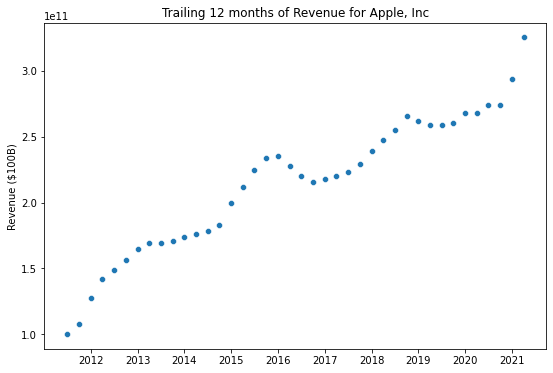

In [5]:
# TTM - Revenue
plt.figure(figsize=(9,6))
sns.scatterplot(x=aapl_df.index,y=aapl_df['Revenue'])
plt.title('Trailing 12 months of Revenue for Apple, Inc')
plt.ylabel('Revenue ($100B)');

In [6]:
# 1-year growth rate, last year of the dataset
(aapl_df['Revenue'][0] - aapl_df['Revenue'][4]) / aapl_df['Revenue'][4]

0.21339477268063356

In [7]:
# 2-year growth rate, last year of the dataset
(1 + (aapl_df['Revenue'][0] - aapl_df['Revenue'][8]) / aapl_df['Revenue'][8])**(1/2)-1

0.12165355461657912

In [8]:
# averaging all 1-yr revenue growths
rev_growth_list = [((aapl_df['Revenue'][i] - aapl_df['Revenue'][i+4]) / aapl_df['Revenue'][i+4]) 
                   for i in range(0,len(aapl_df['Revenue'])-4)]

sum(rev_growth_list)/len(rev_growth_list)

0.11133725497985407

In [9]:
#calculating all average growths at once
growth_list = []
for col in aapl_df.columns:
    try:
        col_growth_list = [((aapl_df[col][i] - aapl_df[col][i+4]) / aapl_df[col][i+4]) 
                           for i in range(0,len(aapl_df[col])-4)]
        print(f"Avg growth for {col} is {sum(col_growth_list)/len(col_growth_list)}")
        growth_list.append(sum(col_growth_list)/len(col_growth_list))
    except:
        print(f"{col} throws an error")

print(f"Avg growth: {sum(growth_list)/len(growth_list)}")

Avg growth for Revenue is 0.11133725497985407
Avg growth for Gross Profit is 0.10594369552209343
Avg growth for Operating Income is 0.08996071324022206
Avg growth for Income Tax Provision is 0.041693283427884045
Avg growth for Net Income Common is 0.1034889307872158
Avg growth for Total Assets is 0.1229159743282768
Avg growth for Total current assets is 0.13270611753933415
Avg growth for Total liabilities is 0.23556981918745235
Avg growth for Total current liabilities is 0.1623257958285469
Avg growth for Shareholders Equity (Total) is -0.003583780903502146
Avg growth for Shares (Common) is -0.046694381827137886
Dividends Paid (Common) throws an error
Avg growth for Capital expenditures is 0.12999951725249131
Avg growth for Operating Cash Flow is 0.1006475188816269
Avg growth for Equity Repurchase (Common, Net) is -0.32919617910389176
Avg growth: 0.06836530565289042


In [10]:
# this code sorts the growth rates from low to high, 
# then it removes the top 2 and lowest 2
growth_list.sort()
normalized_aapl_growth = sum(growth_list[2:-2]) / len(growth_list[2:-2])
normalized_aapl_growth

0.09351092250554965

In [11]:
# defining a new column for FCF
aapl_df['FreeCashFlow'] = aapl_df['Operating Cash Flow'] - aapl_df['Capital expenditures']

In [12]:
# averaging all FCF growth rates
fcf_growth_list = [((aapl_df['FreeCashFlow'][i] - aapl_df['FreeCashFlow'][i+4]) / aapl_df['FreeCashFlow'][i+4]) 
                   for i in range(0,len(aapl_df['FreeCashFlow'])-4)]

fcf_growth_rate1 = sum(fcf_growth_list)/len(fcf_growth_list)
print(f"Free Cash Flow average 1-yr growth rate: {round(fcf_growth_rate1*100,2)}%")

Free Cash Flow average 1-yr growth rate: 10.03%


In [63]:
# Calculate most recent FCF, next year FCF, and discount next year's FCF
bill = 1_000_000_000
discount_rate = 0.0163

print(f"Most recent FCF: ${round(aapl_df['FreeCashFlow'][0]/bill,2)} billion")
print(f"Next year FCF: ${round(aapl_df['FreeCashFlow'][0]*(1+fcf_growth_rate1)/bill,2)} billion")
print(f"Next year FCF, discounted: ${round(aapl_df['FreeCashFlow'][0]*(1+fcf_growth_rate1)**(1)/(1+discount_rate)/bill,2)} billion")

Most recent FCF: $108.71 billion
Next year FCF: $119.62 billion
Next year FCF, discounted: $117.7 billion


In [30]:
aapl_df['FreeCashFlow'][0]*(1+fcf_growth_rate1)**(1/1)/1000000000

119.61614903383273

In [77]:
# DCF using the treasury rate as the discount rate and avg. FCF growth as growth rate
treasury_rate = 0.0163
# we start at zero, then incrementally add each subsequent year's FCF
fcf_over_time1 = 0
# our base will be the most recent year's FCF
fcf_start = aapl_df['FreeCashFlow'][0]

# covering a range of 10 years
for i in range(1,10+1):
    fcf_over_time1 += fcf_start * (1+fcf_growth_rate1)**i / (1+treasury_rate)**i
    print(f"Year {i}: ${round(fcf_start * (1+fcf_growth_rate1)**i / (1+treasury_rate)**i / 1_000_000_000,1)} billion")

print(f"Total FCF: ${round(fcf_over_time1/1_000_000_000,1)} billion")

Year 1: $117.7 billion
Year 2: $127.4 billion
Year 3: $138.0 billion
Year 4: $149.4 billion
Year 5: $161.7 billion
Year 6: $175.1 billion
Year 7: $189.6 billion
Year 8: $205.3 billion
Year 9: $222.2 billion
Year 10: $240.6 billion
Total FCF: $1726.9 billion


In [72]:
# DCF using 5% as the discount rate and avg. FCF growth as growth rate
discount_rate = 0.05
# we start at zero, then incrementally add each subsequent year's FCF
fcf_over_time = 0
# our base will be the most recent year's FCF
fcf_start = aapl_df['FreeCashFlow'][0]

# covering a range of 15 years
for i in range(1,15+1):
    fcf_over_time += fcf_start * (1+fcf_growth_rate1)**i / (1+discount_rate)**i
    print(f"Year {i}: ${round(fcf_start * (1+fcf_growth_rate1)**i / (1+discount_rate)**i / 1_000_000_000,1)} billion")

print(f"Total FCF: ${round(fcf_over_time/1_000_000_000,1)} billion")

Year 1: $113.9 billion
Year 2: $119.4 billion
Year 3: $125.1 billion
Year 4: $131.1 billion
Year 5: $137.4 billion
Year 6: $144.0 billion
Year 7: $150.9 billion
Year 8: $158.1 billion
Year 9: $165.7 billion
Year 10: $173.6 billion
Year 11: $181.9 billion
Year 12: $190.7 billion
Year 13: $199.8 billion
Year 14: $209.4 billion
Year 15: $219.4 billion
Total FCF: $2420.4 billion


In [86]:
# turning FCF into per-share stock price predictions
aapl_fcf1 = round(fcf_over_time1/aapl_df['Shares (Common)'][0],2)
aapl_fcf2 = round(fcf_over_time/aapl_df['Shares (Common)'][0],2)

avg_fcf = round((aapl_fcf1 + aapl_fcf2)/2,2)

print(f"Total FCF per share, v1: ${aapl_fcf1}")
print(f"Total FCF per share, v2: ${aapl_fcf2}")
print(f"Average FCF per share: ${avg_fcf}")

Total FCF per share, v1: $103.49
Total FCF per share, v2: $145.05
Average FCF per share: $124.27


In [36]:
# DCF using treasury as discount rate and all AAPL growth as growth rate
treasury_rate = 0.05
fcf_over_time = 0
fcf_start = aapl_df['FreeCashFlow'][0]
for i in range(1,15+1):
    fcf_over_time += fcf_start * (1+normalized_aapl_growth)**i / (1+treasury_rate)**i

fcf_over_time/1_000_000_000

2291.3389834781656

In [46]:
# if total growth over 5 years is 180%
# then the growth rate is:
growth_180 = 1.8**(1/5)
growth_180

1.1247461131420948

In [61]:
for i in range(0,25):
    print(f"{1+i/4} - {1.80**(1/(1+i/4))}")

1.0 - 1.8
1.25 - 1.60036116503796
1.5 - 1.479727244598282
1.75 - 1.399168447706693
2.0 - 1.3416407864998738
2.25 - 1.2985373526865052
2.5 - 1.2650538190282499
2.75 - 1.2383014044559357
3.0 - 1.21644039911468
3.25 - 1.1982443398361224
3.5 - 1.1828645094459014
3.75 - 1.1696950930790704
4.0 - 1.158292185288269
4.25 - 1.1483231463818495
4.5 - 1.139533831304058
4.75 - 1.1317267469617007
5.0 - 1.1247461131420948
5.25 - 1.118467410511232
5.5 - 1.1127899192821329
5.75 - 1.1076312962277344
6.0 - 1.1029235690267392
6.25 - 1.098610134036251
6.5 - 1.0946434761309831
6.75 - 1.0909834159010432
7.0 - 1.0875957472544207


In [76]:
#this version only considers growth rate starting from t = 0, looking backwards at quarterly data
fcf_growth_list2 = [((1+((aapl_df['FreeCashFlow'][0] - aapl_df['FreeCashFlow'][i+4]) / aapl_df['FreeCashFlow'][i+4]))**(1/(1+i/4))-1) 
                    for i in range(len(aapl_df['FreeCashFlow'])-4)]

In [81]:
fcf_growth_rate2 = sum(fcf_growth_list2)/len(fcf_growth_list2)
fcf_growth_rate2

0.09602325071090867

In [83]:
(fcf_growth_rate1 + fcf_growth_rate2)/2

0.0981783504372449